# Simulated Annealing solution

In [1]:
import random
import math
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy

random.seed(101)

### Coordinates and distance matrix generation

In [2]:
def generate_coordinates(num_cities, x_range=(0, 100), y_range=(0, 100)):
    return [(random.uniform(*x_range, ), random.uniform(*y_range)) for _ in range(num_cities)]

# Matrix with distances between all cities
def compute_distance_matrix(coords):
    num_cities = len(coords)
    matrix = [[0]*num_cities for _ in range(num_cities)]
    for i in range(num_cities):
        for j in range(i+1, num_cities):
            dist = math.dist(coords[i], coords[j])  # Euclidean distance
            matrix[i][j] = matrix[j][i] = dist
    return matrix

### Value of a cost function calculation

In [3]:
# Calculating value of a cost function (sum of distances)
def calculate_cost_function(distance_matrix, path):
    result = 0
    for x,y in zip(path, path[1:]):
        result += distance_matrix[x][y]
    result += distance_matrix[path[-1]][0]
    return result

### Function for visualisation

In [4]:
def plot_tsp(coords, path, filename=None):
    x = [coords[i][0] for i in path]
    y = [coords[i][1] for i in path]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', label='Simulated Annealing Path', color='blue')

    for i, (xi, yi) in enumerate(coords):
        plt.scatter(xi, yi, color='black', zorder=3)
        plt.text(xi + 0.5, yi + 0.5, str(i), fontsize=9)

    start_idx = path[0]
    plt.scatter([coords[start_idx][0]], [coords[start_idx][1]], color='green', s=100, label='Start', zorder=4)

    plt.title("TSP - Simulated Annealing Solution")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)

    if filename:
        plt.savefig(filename, dpi=100, bbox_inches='tight')
    plt.show()


# SA-specific visualisations
# Plotting acceptance probability, cost and temperature history
def plot_sa_params(A_hist, cost_hist, t_hist):
    plt.figure(figsize=(30, 6), dpi=80)

    #plot 1:
    plt.subplot(1, 3, 1)
    plt.scatter([x for x in range(len(A_hist))], A_hist)
    plt.title("Acceptance probability")

    #plot 2:
    plt.subplot(1, 3, 2)
    plt.plot([x for x in range(len(cost_hist))], cost_hist)
    plt.title("Total length (cost)")

    #plot 3:
    plt.subplot(1, 3, 3)
    plt.plot([x for x in range(len(t_hist))], t_hist)
    plt.title("Temperature")

    plt.show()
    return None

# Plotting each iteration result
def plot_sa_iter(coords, path_hist, num_iter, num_vis = 5):
    plt.figure(figsize=(5, 8*num_vis))

    for i in range(num_vis):
        step = math.floor(num_iter/5)
        path = path_hist[i*step]
        x = [coords[i][0] for i in path]
        y = [coords[i][1] for i in path]

        plt.subplot(10, 1, i+1)
        plt.plot(x, y, 'o-', label='Simulated Annealing Path', color='blue')

        start_idx = path[0]
        plt.scatter([coords[start_idx][0]], [coords[start_idx][1]], color='green', s=100, label='Start', zorder=4)
        plt.title("TSP - Simulated Annealing Solution")
        plt.grid(True)

    plt.show()
    return None

## Simulated Annealing algorithm

In [71]:
def simulated_annealing_tsp(distance_matrix, a=0.99, t_init=50, max_iter=100, num_cand = 50, show_iterations=False):
    num_cities = len(distance_matrix)

    # Initiate history for path, cost and t
    path_hist = []  # All paths generated through the algorithm
    cost_hist = []  # Their cost function values
    t_hist = []     # Temperature history
    A_hist = [None] # Activation function values history

    # First path (random) and its cost
    path = [x for x in range(num_cities)]
    cost = calculate_cost_function(distance_matrix, path)
    t = copy.deepcopy(t_init)
    A = None

    # Update history and best
    path_hist.append(path + [path[0]])
    cost_hist.append(cost)
    t_hist.append(t)

    # Initiate best path and its cost
    path_best = copy.deepcopy(path + [path[0]])
    cost_best = copy.deepcopy(cost)

    for i in range(max_iter):
        # Lowering the temperature
        t = t*a

        for _ in range(num_cand):
            # Generating a neighbour: swapping a random pair of adjacent cities in the path
            path_new = copy.deepcopy(path)
            r1 = random.randint(1, num_cities-1)
            # r2 = random.randint(1, num_cities - 1)
            # while r2 == r1:
            #     r2 = random.randint(1, num_cities - 1)
            if r1+1 >= len(path_new):
                r2 = 0
            else:
                r2 = r1+1
            
            path_new[r2], path_new[r1] = path_new[r1], path_new[r2]
            cost_new = calculate_cost_function(distance_matrix, path_new)

            # Calculating activation function
            A = min(1, math.exp(- (cost_new - cost) / t))

            # With a given probability, assign new path as the current
            rnd = random.random()
            if cost_new < cost:
                path = copy.deepcopy(path_new)
                cost = copy.deepcopy(cost_new)
                break
            else:
                if rnd < A:
                    path = copy.deepcopy(path_new)
                    cost = copy.deepcopy(cost_new)
                    break

        # Update bests if new cost is better
        if cost < cost_best:
            path_best = copy.deepcopy(path + [path[0]])
            cost_best = copy.deepcopy(cost)

        if show_iterations:
            print(f"Iteration {i}: cost function = {cost: .2f}, temperature = {t: .2f}, activation = {A: .2f}.")

        # Update history
        path_hist.append(path + [path[0]])
        cost_hist.append(cost)
        t_hist.append(t)
        A_hist.append(A)

    return path_hist, cost_hist, t_hist, A_hist, path_best, cost_best


### Testing the algorithm on different numbers of cities

In [74]:
num_cities = 4
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

Path: [3, 2, 1, 0, 3]
Total cost: 146.7555701383546
Time taken: 0.278859 seconds


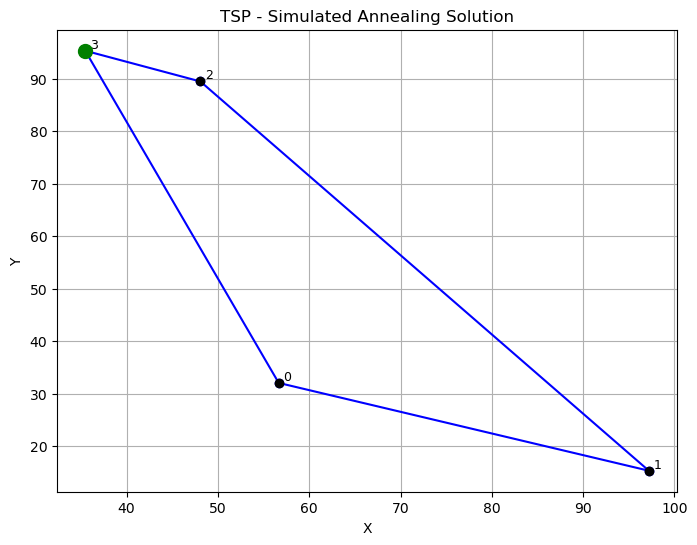

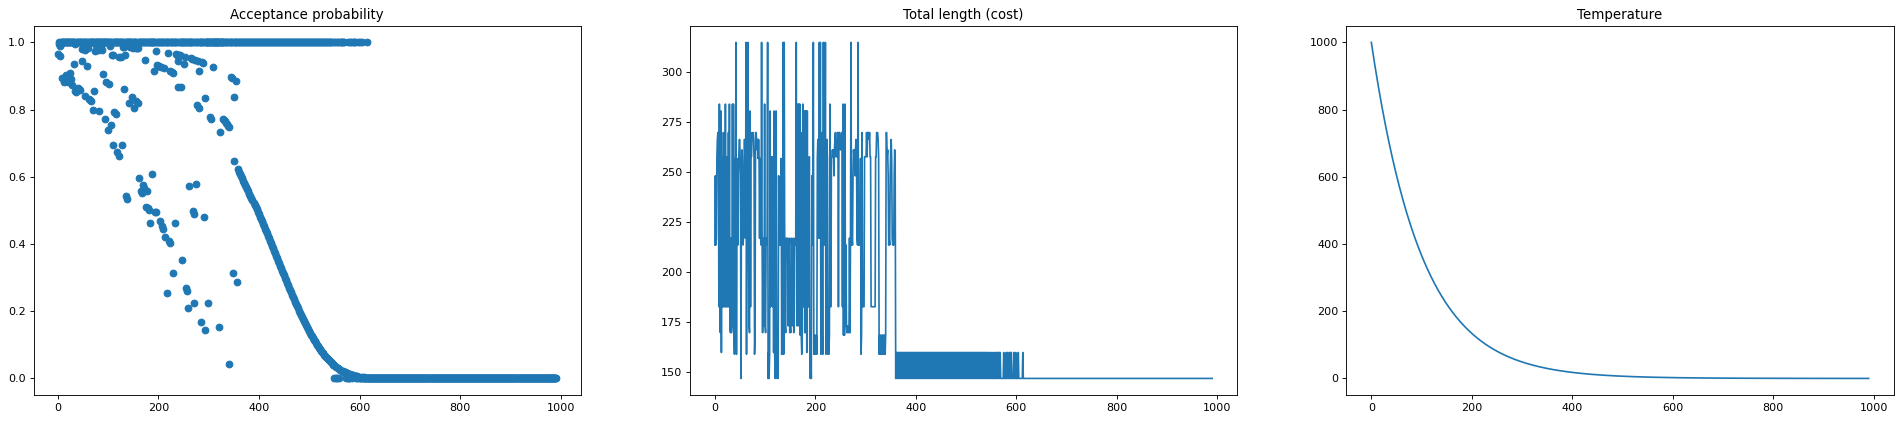

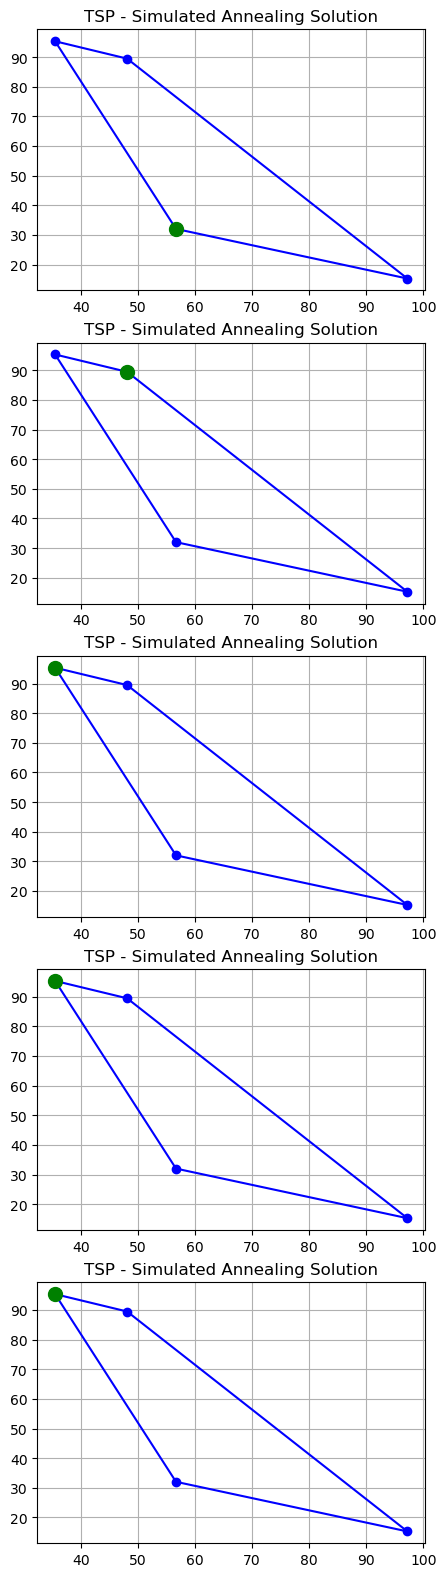

In [75]:
start_time = time.time()
alfa = 0.99
(a, t_init, max_iter, num_cand) = (alfa, 1000, int((alfa)*1000), 100)
path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a, t_init, max_iter, num_cand,show_iterations=False)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path,filename='50_NN.png')
plot_sa_params(A_hist, cost_hist, t_hist)
plot_sa_iter(coords, path_hist, max_iter)

Path: [19, 1, 14, 7, 3, 4, 2, 9, 5, 6, 8, 11, 16, 0, 13, 17, 10, 15, 12, 18, 19]
Total cost: 711.6930556727023
Time taken: 0.241582 seconds


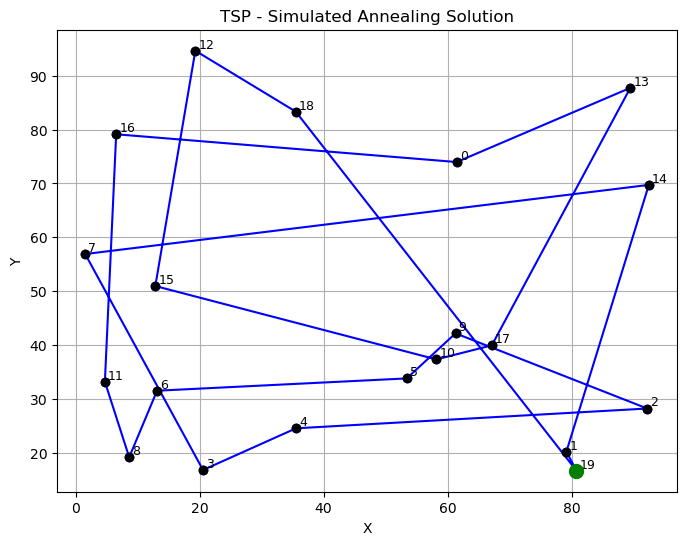

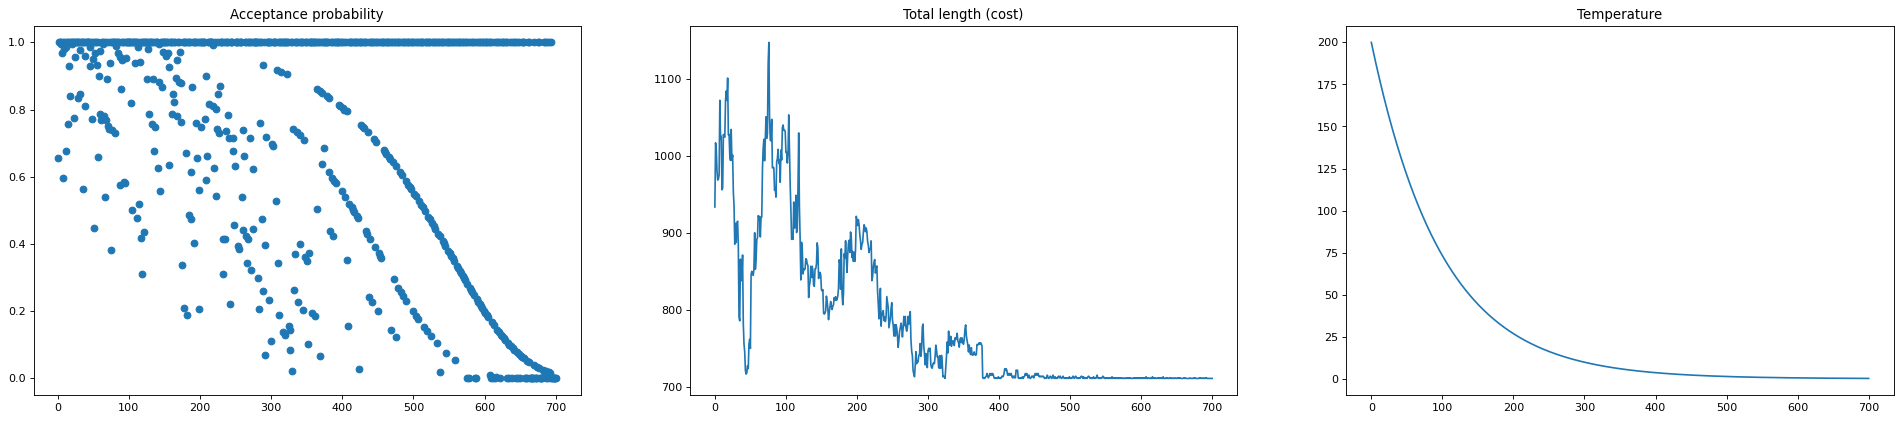

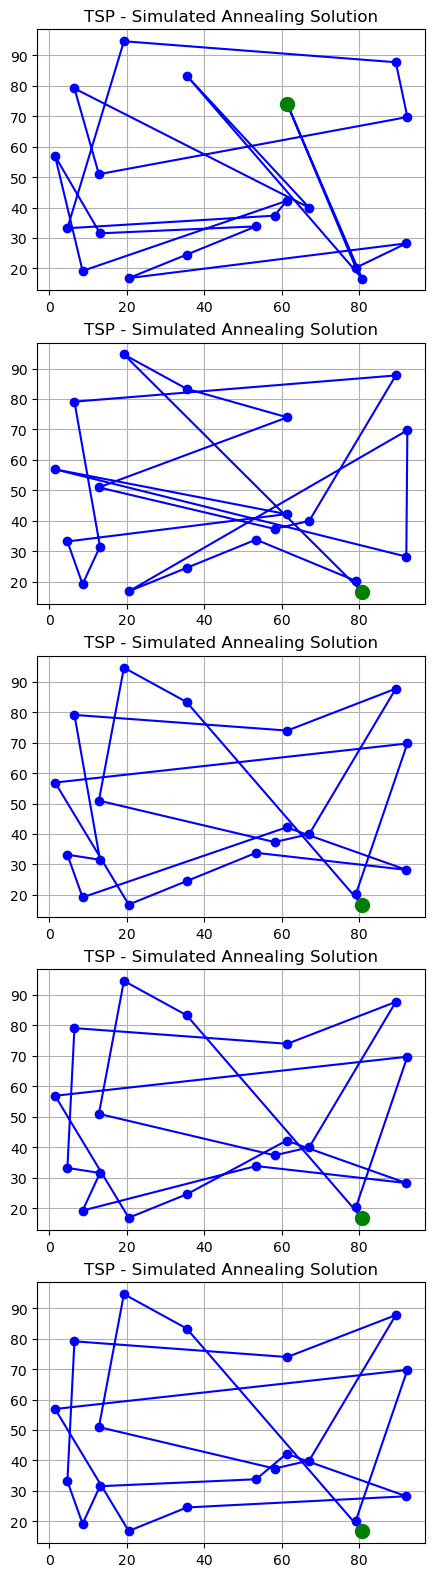

In [29]:
num_cities = 20
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
(a, t_init, max_iter, num_cand) = (0.99, 200, 700, 200)
path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a, t_init, max_iter, num_cand)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path,filename='50_NN.png')
plot_sa_params(A_hist, cost_hist, t_hist)
plot_sa_iter(coords, path_hist, max_iter)

Path: [29, 14, 5, 8, 7, 3, 1, 4, 9, 2, 18, 6, 19, 11, 10, 17, 12, 15, 16, 22, 20, 26, 13, 21, 23, 27, 31, 28, 25, 30, 33, 24, 32, 34, 0, 29]
Total cost: 1235.8251861261017
Time taken: 0.201853 seconds


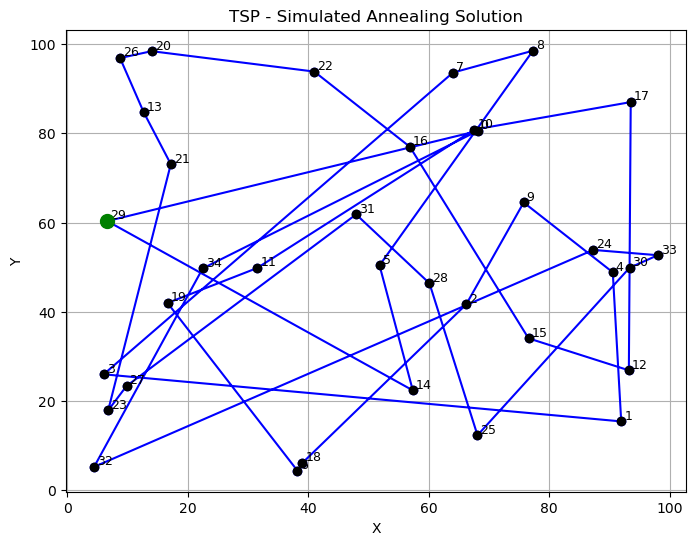

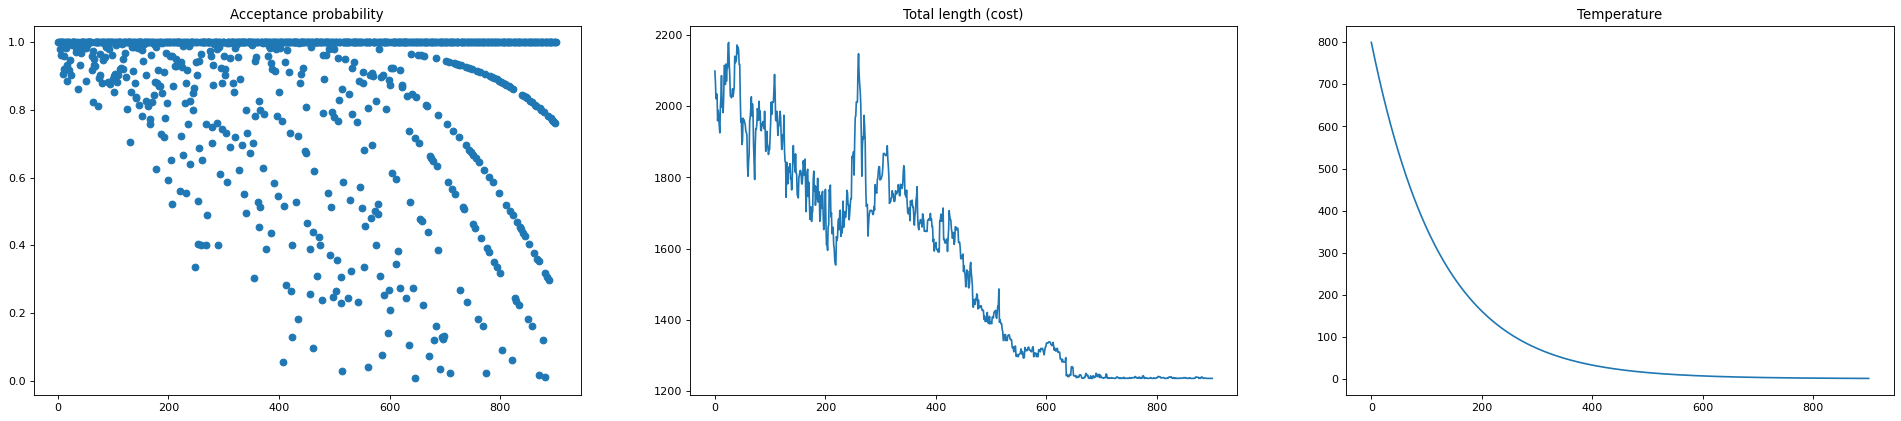

In [8]:
num_cities = 35
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
(a, t_init, max_iter, num_cand) = (0.992, 800, 900, 350)
path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a, t_init, max_iter, num_cand)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path,filename='50_NN.png')
plot_sa_params(A_hist, cost_hist, t_hist)

Path: [0, 49, 17, 16, 31, 14, 13, 12, 35, 22, 43, 39, 34, 29, 32, 26, 1, 44, 37, 15, 25, 6, 10, 46, 48, 20, 41, 18, 24, 30, 21, 19, 45, 7, 42, 38, 11, 5, 28, 2, 27, 33, 40, 4, 9, 3, 8, 36, 23, 47, 0]
Total cost: 719.0910418584505
Time taken: 4.585563 seconds


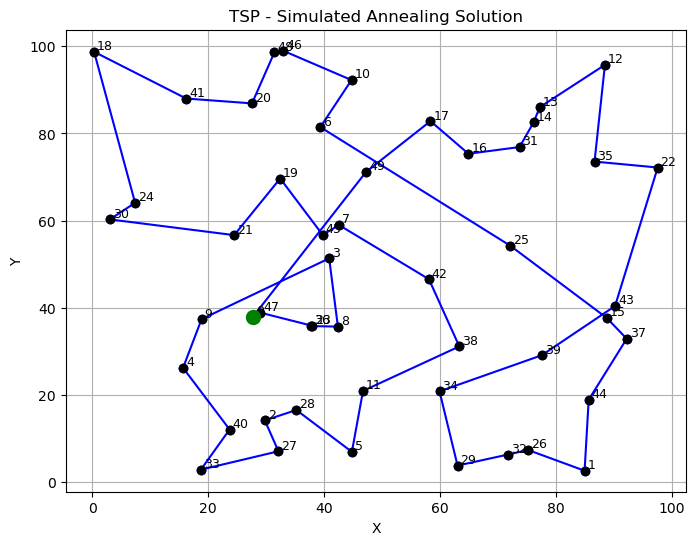

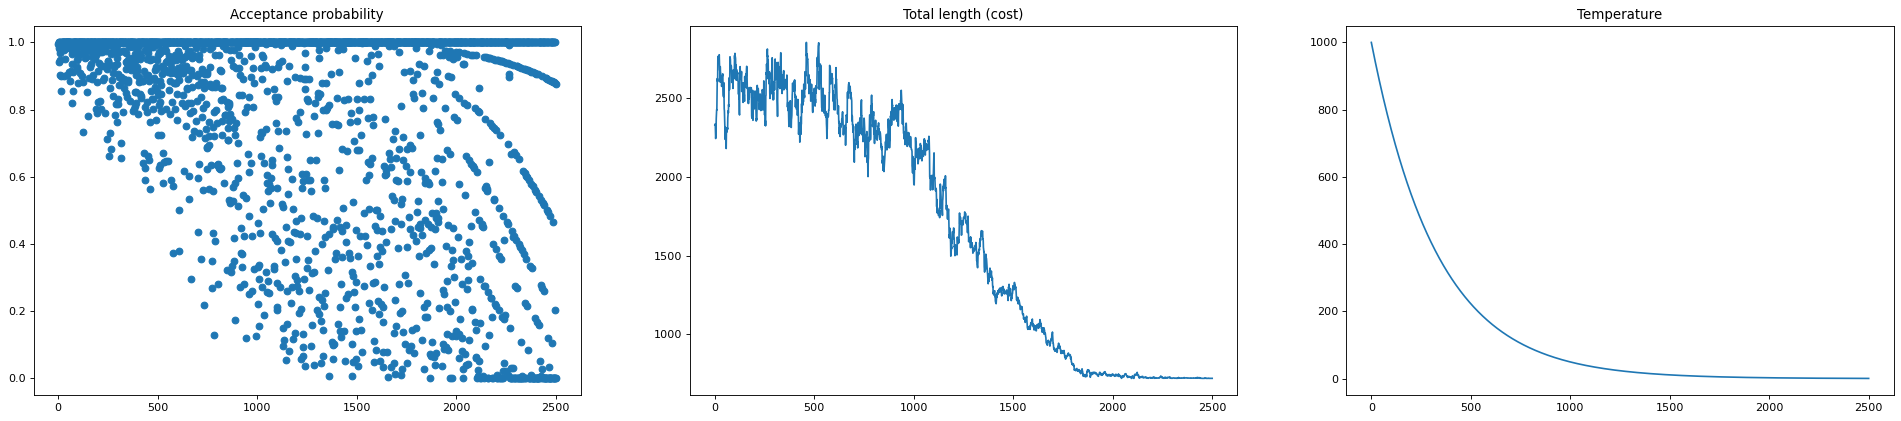

In [9]:
num_cities = 50
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
(a, t_init, max_iter, num_cand) = (0.997, 1000, 2500, 500)
path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a, t_init, max_iter, num_cand)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path,filename='50_NN.png')
plot_sa_params(A_hist, cost_hist, t_hist)

Path: [0, 96, 67, 27, 74, 5, 88, 89, 81, 22, 92, 68, 21, 36, 6, 43, 82, 38, 79, 3, 46, 99, 70, 58, 42, 85, 52, 56, 86, 78, 65, 94, 1, 64, 97, 48, 69, 77, 15, 31, 29, 34, 55, 20, 83, 73, 37, 45, 93, 2, 57, 87, 98, 53, 95, 8, 26, 80, 71, 32, 16, 90, 23, 76, 84, 61, 7, 17, 14, 40, 49, 9, 25, 4, 30, 11, 19, 10, 75, 51, 47, 62, 50, 39, 18, 91, 35, 44, 12, 60, 72, 28, 63, 13, 66, 54, 41, 59, 33, 24, 0]
Total cost: 1273.049292382136
Time taken: 6.929416 seconds


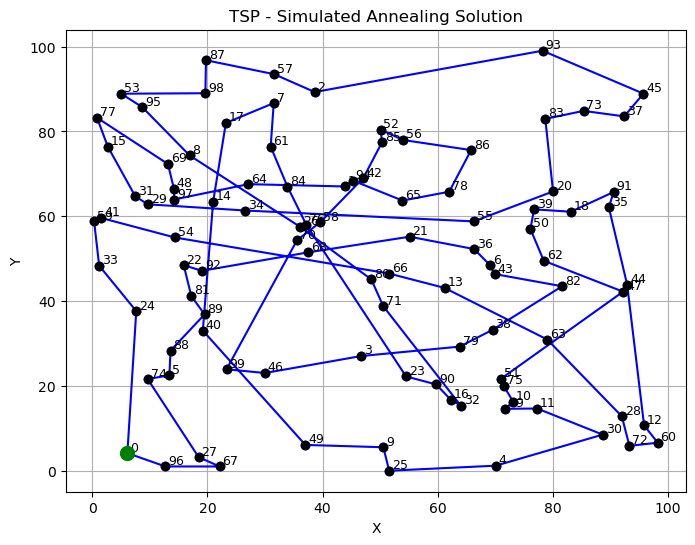

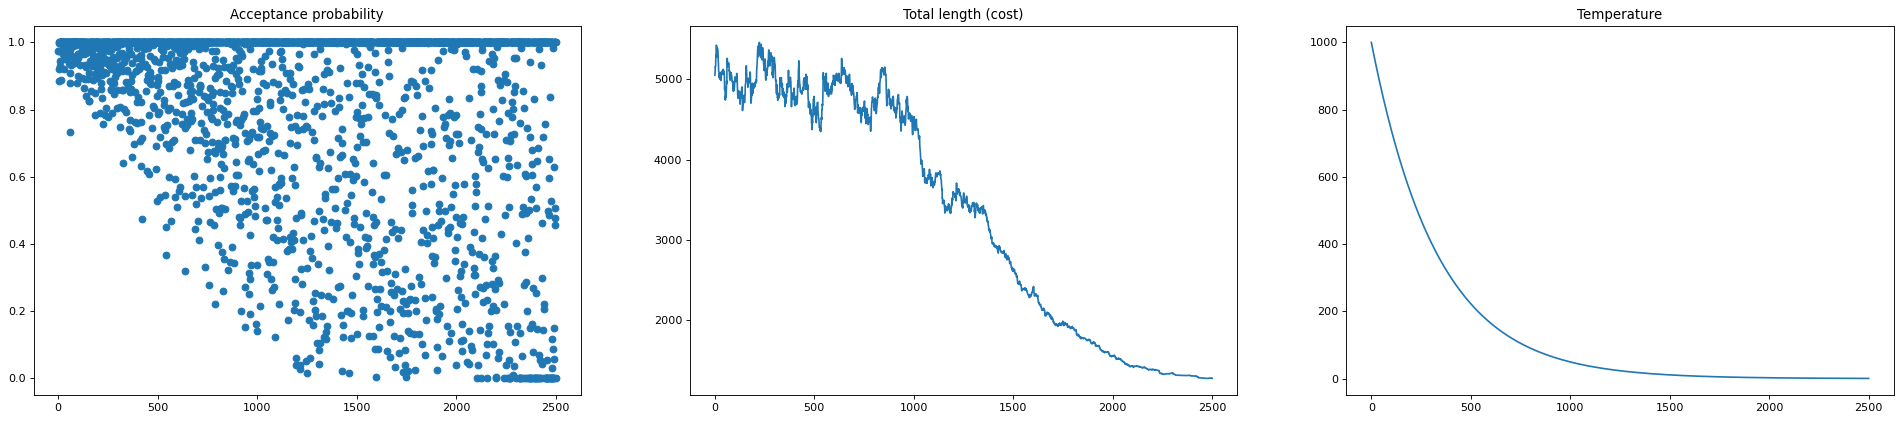

In [10]:
num_cities = 100
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
(a, t_init, max_iter, num_cand) = (0.997, 1000, 2500, 500)
path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a, t_init, max_iter, num_cand)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path,filename='50_NN.png')
plot_sa_params(A_hist, cost_hist, t_hist)

### Generating a summary: times and cost function

In [11]:
trials_per_size = 100
results = []

for num_cities in range(10, 101, 1):
    times = []
    lengths = []

    for trial in range(trials_per_size):
        random.seed(101)
        coords = generate_coordinates(num_cities)
        distance_matrix = compute_distance_matrix(coords)

        (a, t_init, max_iter, num_cand) = (0.97, 100, 200, 100)
        if num_cities <= 20:
            (a, t_init, max_iter, num_cand) = (0.99, 200, 700, 200)
        elif num_cities <= 35:
            (a, t_init, max_iter, num_cand) = (0.992, 800, 900, 350)
        else:
            (a, t_init, max_iter, num_cand) = (0.997, 1000, 3000, 500)

        start_time = time.time()
        path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a, t_init, max_iter, num_cand)
        end_time = time.time()

        times.append(end_time - start_time)
        lengths.append(cost)

    results.append({
        "Number of Cities": num_cities,
        "Avg Total Length": sum(lengths) / trials_per_size,
        "Avg Time (s)": sum(times) / trials_per_size
    })


df = pd.DataFrame(results)
df
# df.to_csv("sa_tsp_avg_results.csv", index=False)

KeyboardInterrupt: 

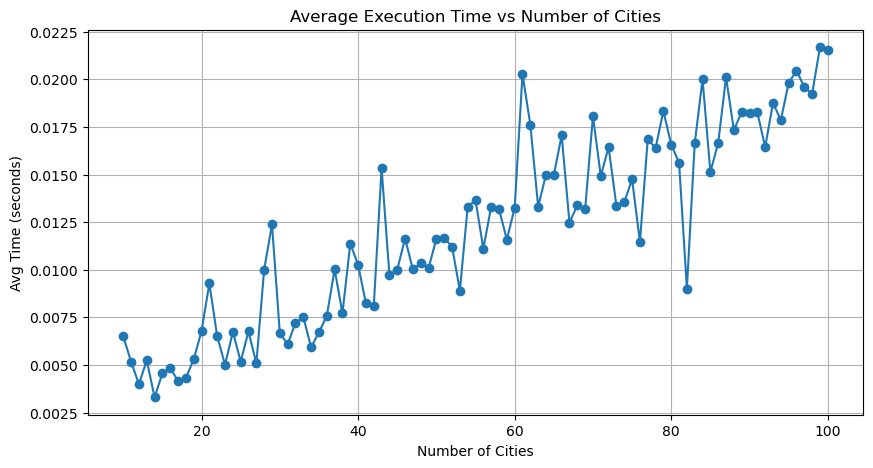

In [108]:
plt.figure(figsize=(10, 5))
plt.plot(df["Number of Cities"], df["Avg Time (s)"], marker='o')
plt.title("Average Execution Time vs Number of Cities")
plt.xlabel("Number of Cities")
plt.ylabel("Avg Time (seconds)")
plt.grid(True)
plt.savefig("sa_tsp_avg_time.png", dpi=100, bbox_inches='tight')

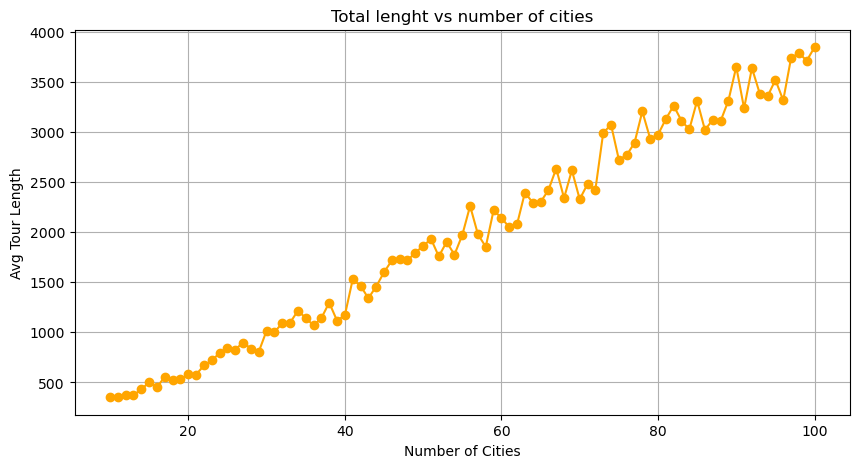

In [109]:
plt.figure(figsize=(10, 5))
plt.plot(df["Number of Cities"], df["Avg Total Length"], marker='o', color='orange')
plt.title("Total lenght vs number of cities")
plt.xlabel("Number of Cities")
plt.ylabel("Avg Tour Length")
plt.grid(True)
plt.savefig("sa_tsp_avg_length.png", dpi=100, bbox_inches='tight')

In [ ]:
num_cities = 50
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

In [188]:
path_hist, cost_hist, t_hist, A_hist, path_best, cost_best = simulated_annealing_tsp(distance_matrix, a=0.998, t_init=1000, max_iter=5000, num_cand=500)

Iteration 0: cost function =  2452.73, temperature =  998.00, activation =  1.00.
Iteration 1: cost function =  2470.02, temperature =  996.00, activation =  0.98.
Iteration 2: cost function =  2436.85, temperature =  994.01, activation =  1.00.
Iteration 3: cost function =  2381.78, temperature =  992.02, activation =  1.00.
Iteration 4: cost function =  2455.68, temperature =  990.04, activation =  0.93.
Iteration 5: cost function =  2426.98, temperature =  988.06, activation =  1.00.
Iteration 6: cost function =  2356.45, temperature =  986.08, activation =  1.00.
Iteration 7: cost function =  2460.53, temperature =  984.11, activation =  0.90.
Iteration 8: cost function =  2472.57, temperature =  982.14, activation =  0.99.
Iteration 9: cost function =  2317.72, temperature =  980.18, activation =  1.00.
Iteration 10: cost function =  2378.66, temperature =  978.22, activation =  0.94.
Iteration 11: cost function =  2375.47, temperature =  976.26, activation =  1.00.
Iteration 12: 

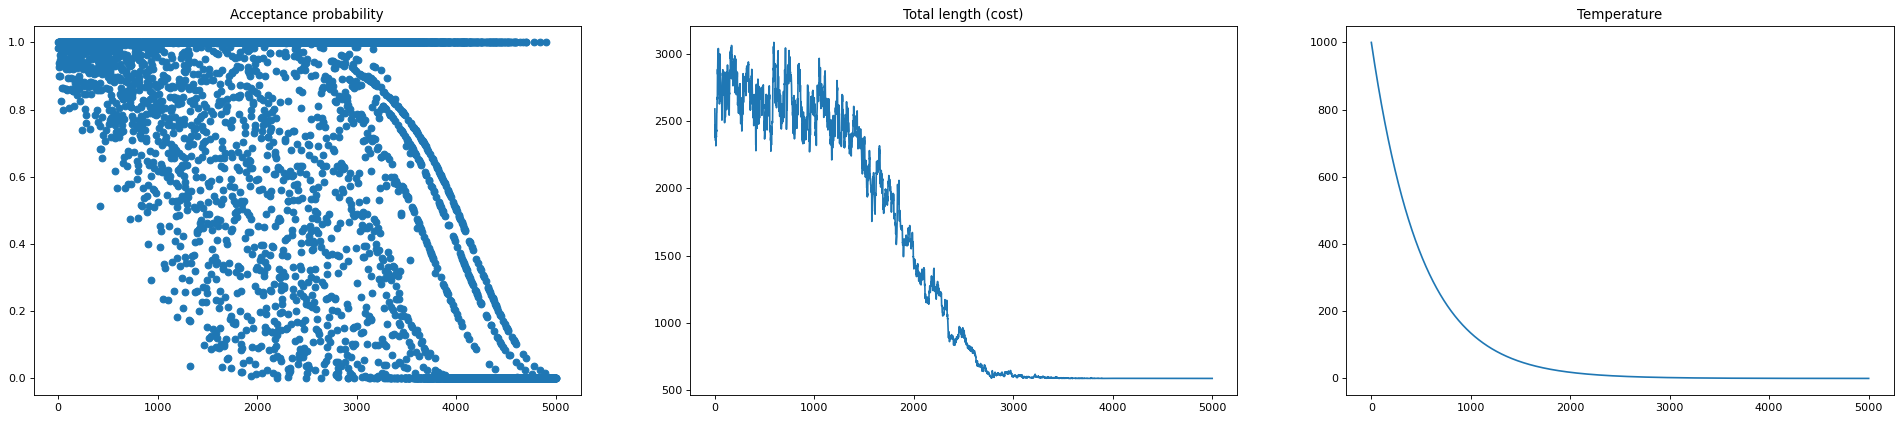

In [189]:
plt.figure(figsize=(30, 6), dpi=80)

#plot 1:
plt.subplot(1, 3, 1)
plt.scatter([x for x in range(len(A_hist))], A_hist)
plt.title("Acceptance probability")

#plot 2:
plt.subplot(1, 3, 2)
plt.plot([_ for _ in range(len(cost_hist))], cost_hist)
plt.title("Total length (cost)")

#plot 3:
plt.subplot(1, 3, 3)
plt.plot([_ for _ in range(len(t_hist))], t_hist)
plt.title("Temperature")

plt.show()

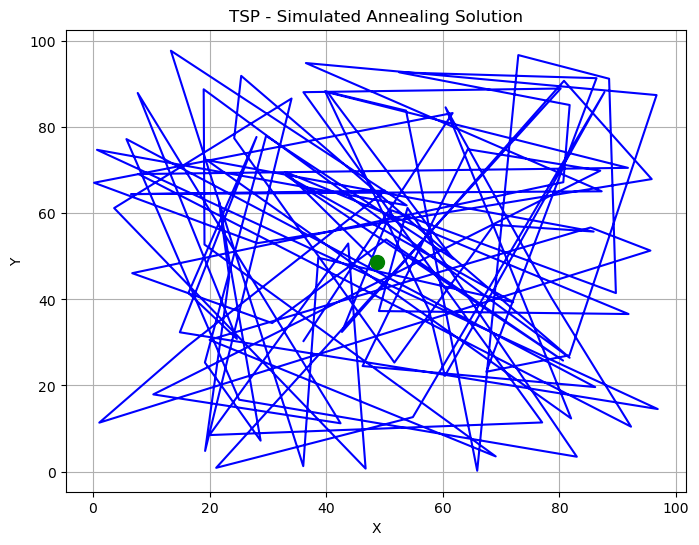

In [207]:
# path = [x for x in range(num_cities)]
path = path_best

x = [coords[i][0] for i in path]
y = [coords[i][1] for i in path]

plt.figure(figsize=(8, 6))
plt.plot(x, y, '-', label='Nearest Neighbour Path', color='blue')

# for i, (xi, yi) in enumerate(coords):
#     plt.scatter(xi, yi, color='black', zorder=3)
#     plt.text(xi + 0.5, yi + 0.5, str(i), fontsize=9)

start_idx = path[0]
plt.scatter([coords[start_idx][0]], [coords[start_idx][1]], color='green', s=100, label='Start', zorder=4)

plt.title("TSP - Simulated Annealing Solution")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)


# if filename:
#     plt.savefig(filename, dpi=100, bbox_inches='tight')
plt.show()



Iteration 0: cost function =  2745.05, temperature =  998.00, activation =  0.89.
Iteration 1: cost function =  2684.14, temperature =  996.00, activation =  1.00.
Iteration 2: cost function =  2608.97, temperature =  994.01, activation =  1.00.
Iteration 3: cost function =  2717.11, temperature =  992.02, activation =  0.90.
Iteration 4: cost function =  2669.13, temperature =  990.04, activation =  1.00.
Iteration 5: cost function =  2729.94, temperature =  988.06, activation =  0.94.
Iteration 6: cost function =  2737.89, temperature =  986.08, activation =  0.99.
Iteration 7: cost function =  2617.37, temperature =  984.11, activation =  1.00.
Iteration 8: cost function =  2551.30, temperature =  982.14, activation =  1.00.
Iteration 9: cost function =  2452.46, temperature =  980.18, activation =  1.00.
Iteration 10: cost function =  2457.09, temperature =  978.22, activation =  1.00.
Iteration 11: cost function =  2466.23, temperature =  976.26, activation =  0.99.
Iteration 12: 

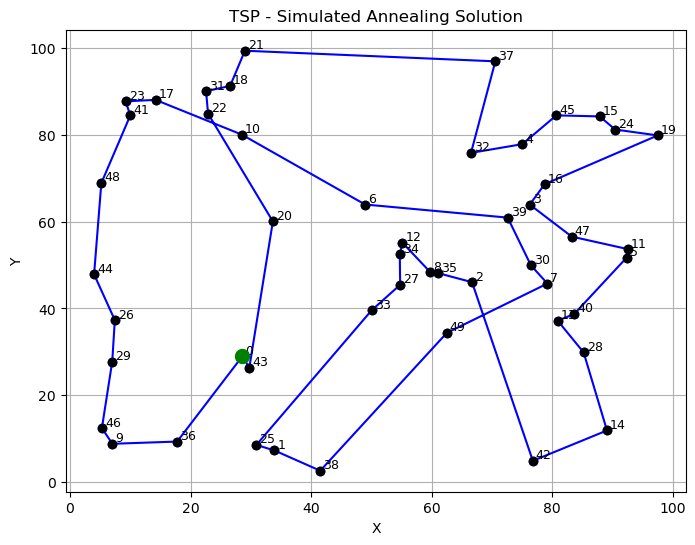

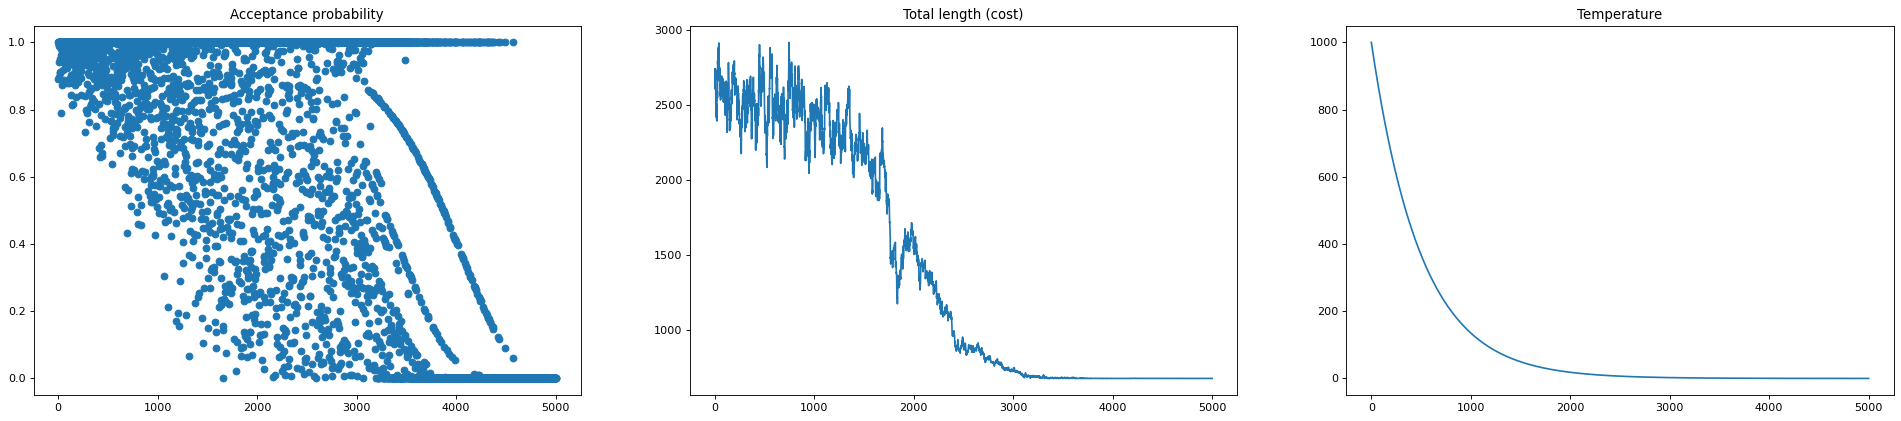

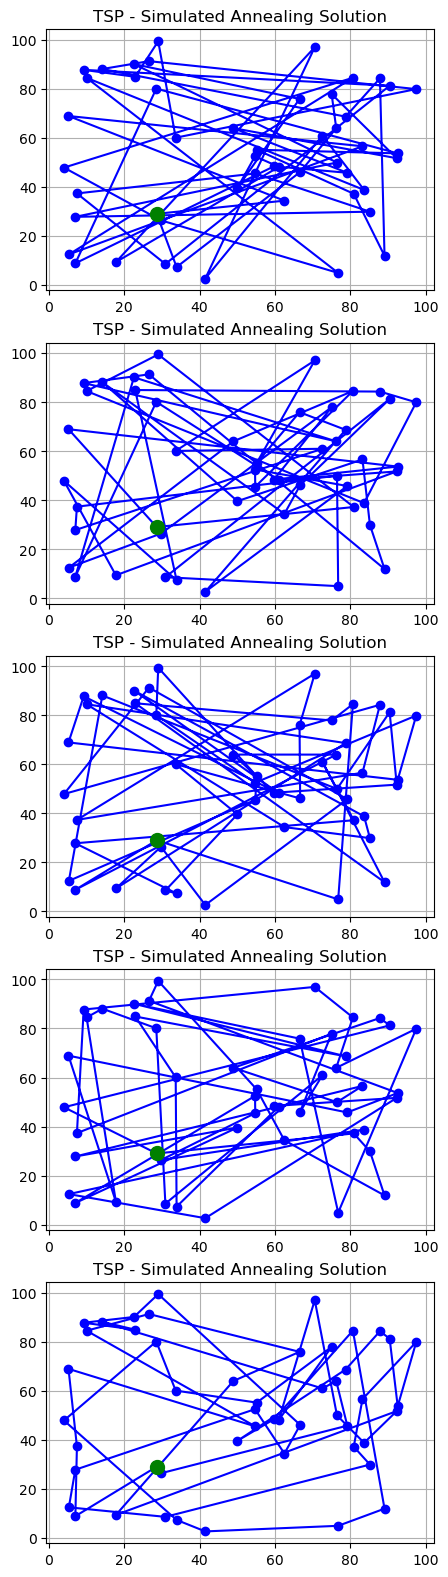

In [117]:
num_cities = 50
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
path_hist, cost_hist, t_hist, A_hist, path, cost = simulated_annealing_tsp(distance_matrix, a=0.998, t_init=1000, max_iter=5000, num_cand=500, show_iterations=True)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path,filename='50_NN.png')
plot_sa_params(A_hist, cost_hist, t_hist)
plot_sa_iter(coords, path_hist, max_iter)